In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("../data/thyroid_cancer_risk_data.csv")
df

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [5]:
print("\nTamaño del dataset:", df.shape)


Tamaño del dataset: (212691, 17)


In [6]:
# Clasificación de variables
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("\nVariables categóricas:", categorical_cols)
print("Variables numéricas:", numerical_cols)


Variables categóricas: ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']
Variables numéricas: ['Patient_ID', 'Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']


In [7]:
# Análisis de valores nulos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
print("\nValores nulos por columna:\n", missing_values)


Valores nulos por columna:
 Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


In [8]:
# Análisis de duplicados
duplicates_count = df.duplicated().sum()
print("\nNúmero de registros duplicados:", duplicates_count)


Número de registros duplicados: 0


In [9]:
# Estadísticas descriptivas de variables numéricas
numerical_stats = df[numerical_cols].describe()
print("\nEstadísticas de variables numéricas:\n", numerical_stats)


Estadísticas de variables numéricas:
          Patient_ID            Age      TSH_Level       T3_Level  \
count  212691.00000  212691.000000  212691.000000  212691.000000   
mean   106346.00000      51.918497       5.045102       2.001727   
std     61398.74739      21.632815       2.860264       0.866248   
min         1.00000      15.000000       0.100000       0.500000   
25%     53173.50000      33.000000       2.570000       1.250000   
50%    106346.00000      52.000000       5.040000       2.000000   
75%    159518.50000      71.000000       7.520000       2.750000   
max    212691.00000      89.000000      10.000000       3.500000   

            T4_Level    Nodule_Size  
count  212691.000000  212691.000000  
mean        8.246204       2.503403  
std         2.164188       1.444631  
min         4.500000       0.000000  
25%         6.370000       1.250000  
50%         8.240000       2.510000  
75%        10.120000       3.760000  
max        12.000000       5.000000  


In [10]:
# Descriptive statistics of categorical variables
print("\nDescriptive statistics of categorical variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Count: {df[col].count()}")
    print("  Unique values:")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        print(f"  - {val}: {count} values")


Descriptive statistics of categorical variables:

Gender:
  Count: 212691
  Unique values:
  - Female: 127527 values
  - Male: 85164 values

Country:
  Count: 212691
  Unique values:
  - India: 42496 values
  - China: 31978 values
  - Nigeria: 31918 values
  - Brazil: 21413 values
  - Russia: 21297 values
  - Japan: 16867 values
  - South Korea: 14965 values
  - UK: 10642 values
  - USA: 10558 values
  - Germany: 10557 values

Ethnicity:
  Count: 212691
  Unique values:
  - Caucasian: 63669 values
  - Asian: 53261 values
  - African: 42414 values
  - Hispanic: 32012 values
  - Middle Eastern: 21335 values

Family_History:
  Count: 212691
  Unique values:
  - No: 148866 values
  - Yes: 63825 values

Radiation_Exposure:
  Count: 212691
  Unique values:
  - No: 180831 values
  - Yes: 31860 values

Iodine_Deficiency:
  Count: 212691
  Unique values:
  - No: 159673 values
  - Yes: 53018 values

Smoking:
  Count: 212691
  Unique values:
  - No: 170260 values
  - Yes: 42431 values

Obesity:


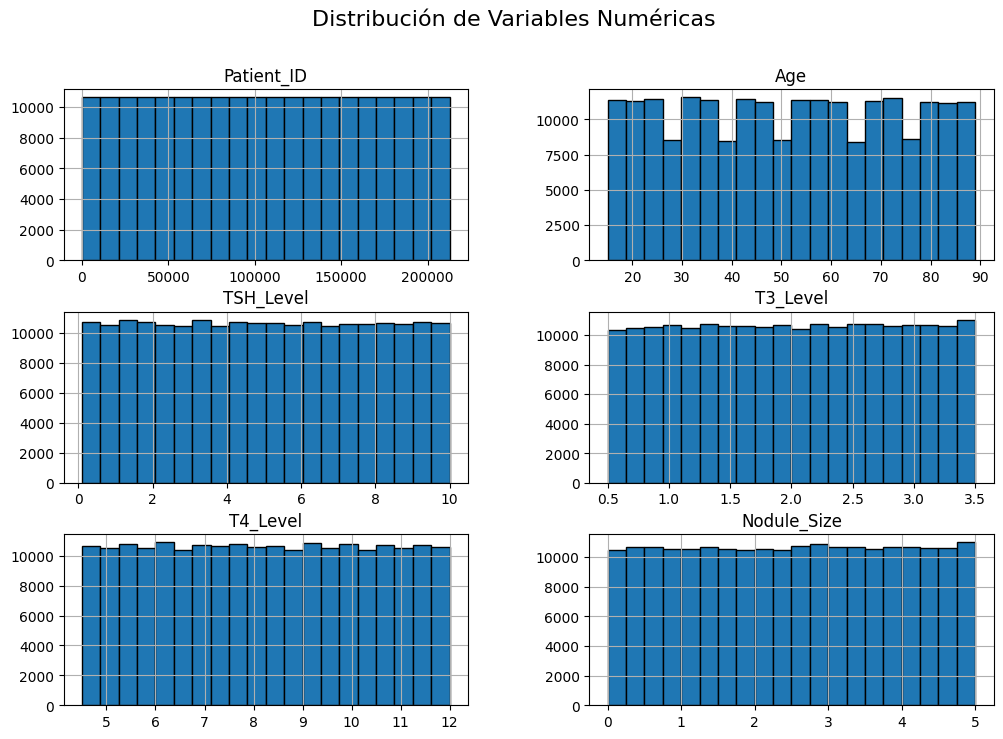

In [11]:
# Histograma de variables numéricas
df[numerical_cols].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

C:\Users\Andrés\AppData\Local\Temp\ipykernel_5592\2049187300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="coolwarm")
C:\Users\Andrés\AppData\Local\Temp\ipykernel_5592\2049187300.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
C:\Users\Andrés\AppData\Local\Temp\ipykernel_5592\2049187300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="coolwarm")
C:\Users\Andrés\AppData\Loc

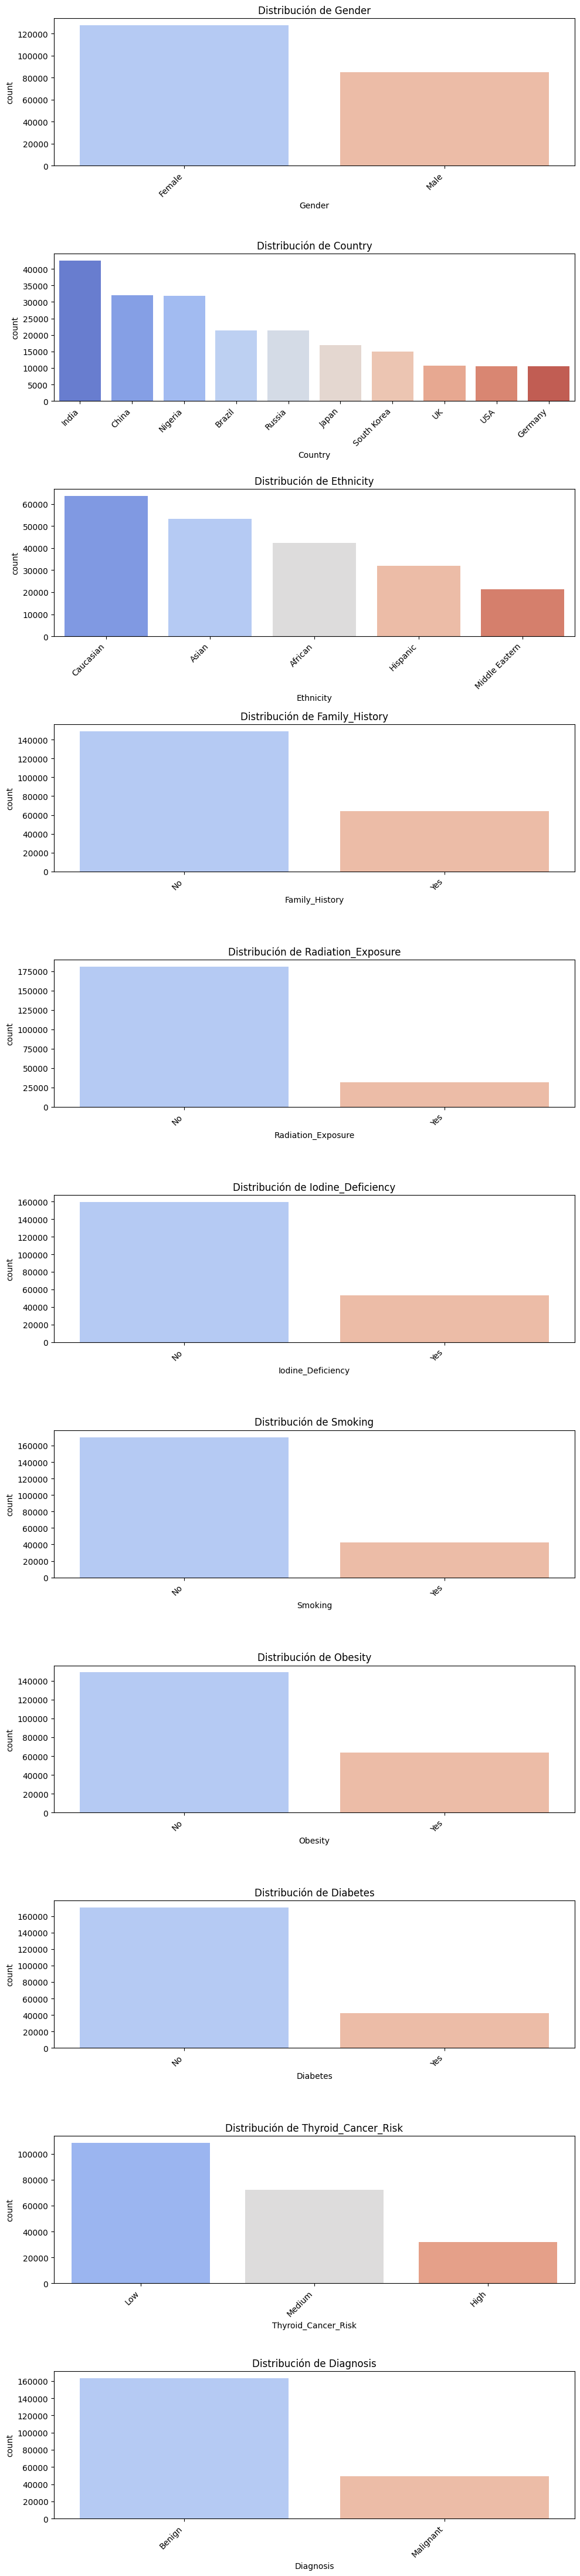

In [12]:
# Gráficos de barras para variables categóricas
fig, axes = plt.subplots(nrows=len(categorical_cols), figsize=(10, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index, palette="coolwarm")
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

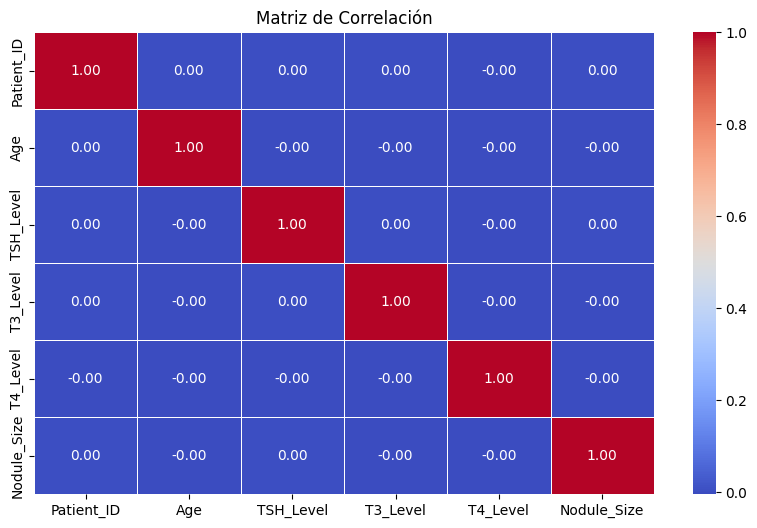

In [13]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()